<a href="https://colab.research.google.com/github/sakshiigdtuw/HACKHAZARD_RURAL_PROJECT/blob/main/Plant_Disease_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install opendatasets


In [8]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

Skipping, found downloaded files in "./new-plant-diseases-dataset" (use force=True to force download)


In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **Data preprocessing**

**Training Image Preprocessing**

In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


**Validation Image Preprocessing**


In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [12]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [13]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[120.   109.   113.  ]
   [108.    97.   101.  ]
   [122.75 111.75 115.75]
   ...
   [122.5  111.5  117.5 ]
   [145.25 134.25 140.25]
   [141.75 130.75 136.75]]

  [[118.   107.   111.  ]
   [115.75 104.75 108.75]
   [121.25 110.25 114.25]
   ...
   [122.75 111.75 117.75]
   [149.   138.   144.  ]
   [140.5  129.5  135.5 ]]

  [[127.5  116.5  120.5 ]
   [113.25 102.25 106.25]
   [118.   107.   111.  ]
   ...
   [137.   126.   132.  ]
   [135.25 124.25 130.25]
   [145.5  134.5  140.5 ]]

  ...

  [[115.5  104.5  112.5 ]
   [112.5  101.5  109.5 ]
   [107.    96.   104.  ]
   ...
   [126.75 119.75 127.75]
   [139.5  132.5  140.5 ]
   [120.25 113.25 121.25]]

  [[115.75 104.75 112.75]
   [106.25  95.25 103.25]
   [106.    95.   103.  ]
   ...
   [127.75 120.75 128.75]
   [132.25 125.25 133.25]
   [147.   140.   148.  ]]

  [[116.   105.   113.  ]
   [117.75 106.75 114.75]
   [106.25  95.25 103.25]
   ...
   [129.5  122.5  130.5 ]
   [129.25 122.25 130.25]
   [149.75 142.75 15

In [14]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,Input
from tensorflow.keras.models import Sequential

In [15]:
model = Sequential()

In [ ]:
#building convulation model

In [16]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
# model.add(Input(shape=(128, 128, 3)))
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [21]:
model.add(Dropout(0.25))

In [22]:
model.add(Flatten())
model.add(Dense(units=1500,activation='relu'))



In [23]:
model.add(Dropout(0.4))  #to avoid overfitting(model unable to fetch data)

In [24]:
#output layer
model.add(Dense(units=38,activation='softmax'))

Model compilar

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

Model Training

In [27]:
training_history = model.fit(x=training_set,epochs=10,validation_data=validation_set)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 151s 63ms/step - accuracy: 0.3932 - loss: 2.1688 - val_accuracy: 0.8366 - val_loss: 0.5263
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 140s 64ms/step - accuracy: 0.8325 - loss: 0.5293 - val_accuracy: 0.9100 - val_loss: 0.2844
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 60ms/step - accuracy: 0.9050 - loss: 0.2964 - val_accuracy: 0.9155 - val_loss: 0.2626
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 60ms/step - accuracy: 0.9344 - loss: 0.2007 - val_accuracy: 0.9492 - val_loss: 0.1614
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 151s 64ms/step - accuracy: 0.9536 - loss: 0.1403 - val_accuracy: 0.9446 - val_loss: 0.1840
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 60ms/step - accuracy: 0.9623 - loss: 0.1114 - val_accuracy: 0.9495 - val_loss: 0.1686
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 60ms/step - accuracy: 0.9696 - loss: 0.0907 - val_accuracy: 0.9612 - val_loss: 0.1304
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 61ms/step - accuracy: 

**Model Evaluation**

In [28]:
# Modal eval on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - accuracy: 0.9851 - loss: 0.0434


In [29]:
print(train_loss , train_acc)

0.04190542548894882 0.9861725568771362


In [30]:
# Model eval on validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9562 - loss: 0.1534


In [31]:
print(val_loss , val_acc)

0.15280941128730774 0.9566924571990967


***Model Saving***

In [32]:
model.save("trained_model.keras")

In [33]:
training_history.history

{'accuracy': [0.5932854413986206,
  0.8544135689735413,
  0.9136780500411987,
  0.9383739829063416,
  0.9545913934707642,
  0.964293360710144,
  0.9704957604408264,
  0.9777935743331909,
  0.9793726205825806,
  0.9820613265037537],
 'loss': [1.3834172487258911,
  0.4589875340461731,
  0.2706775665283203,
  0.18874844908714294,
  0.13670675456523895,
  0.10549525916576385,
  0.08922800421714783,
  0.06950542330741882,
  0.06357837468385696,
  0.056753359735012054],
 'val_accuracy': [0.8365581631660461,
  0.9099704027175903,
  0.9155474901199341,
  0.9492374062538147,
  0.9446278214454651,
  0.9495219588279724,
  0.9612451791763306,
  0.9631231427192688,
  0.9623264074325562,
  0.9566924571990967],
 'val_loss': [0.526272177696228,
  0.284417986869812,
  0.2625964283943176,
  0.1613723635673523,
  0.18395322561264038,
  0.16858527064323425,
  0.13038378953933716,
  0.12972524762153625,
  0.1371699571609497,
  0.15280942618846893]}

In [34]:
# Recording model history in json
import json
with open("training_hist.json","w") as f:
  json.dump(training_history.history,f)

**Accuracy Visualization**

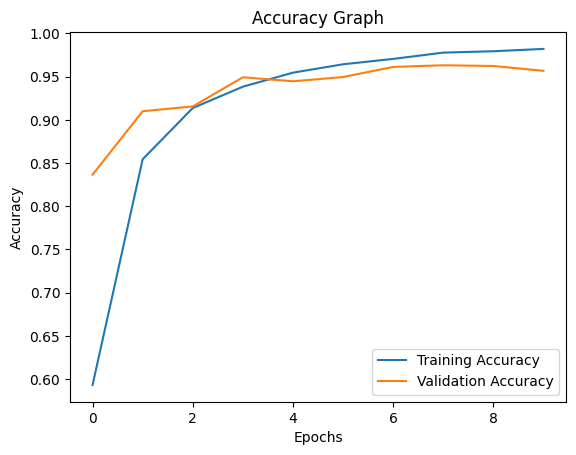

In [35]:
epochs = [i for i in range(10)]
plt.plot(epochs,training_history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()

**Other Metrics for model evaluation**

In [36]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [37]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [38]:
y_pred = model.predict(test_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step


In [39]:
y_pred,y_pred.shape

(array([[9.9999905e-01, 9.1344998e-07, 1.2667229e-09, ..., 9.9206227e-15,
         3.4481155e-12, 2.8195528e-11],
        [9.9987566e-01, 2.9645455e-06, 6.9767285e-09, ..., 3.7480736e-13,
         2.5434186e-12, 1.3935152e-10],
        [9.9990940e-01, 3.1876014e-05, 1.7447319e-05, ..., 3.6201476e-12,
         3.6583021e-09, 1.3223276e-07],
        ...,
        [1.7408172e-17, 3.8517048e-20, 3.4088745e-17, ..., 1.5275869e-18,
         6.6141264e-19, 1.0000000e+00],
        [3.6538139e-17, 2.9934139e-19, 1.1964449e-17, ..., 4.7452792e-18,
         1.3053247e-17, 1.0000000e+00],
        [8.0723426e-15, 1.9400817e-17, 1.2838099e-15, ..., 1.6097707e-18,
         2.2785597e-15, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [40]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [41]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [42]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

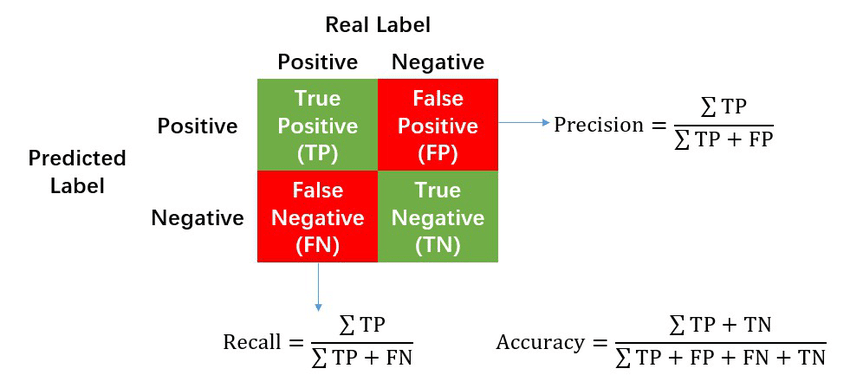


In [43]:
 from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.93      0.96       504
                                 Apple___Black_rot       0.96      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.98      0.98       440
                                   Apple___healthy       0.94      0.97      0.96       502
                               Blueberry___healthy       0.97      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.95      0.98      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.83      0.97      0.90       410
                       Corn_(maize)___Common_rust_       1.00      0.96      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.88      0.

In [45]:
confmatrix =  confusion_matrix(y_true,predicted_categories)
confmatrix.shape

(38, 38)

**Confusion matrix visualization**

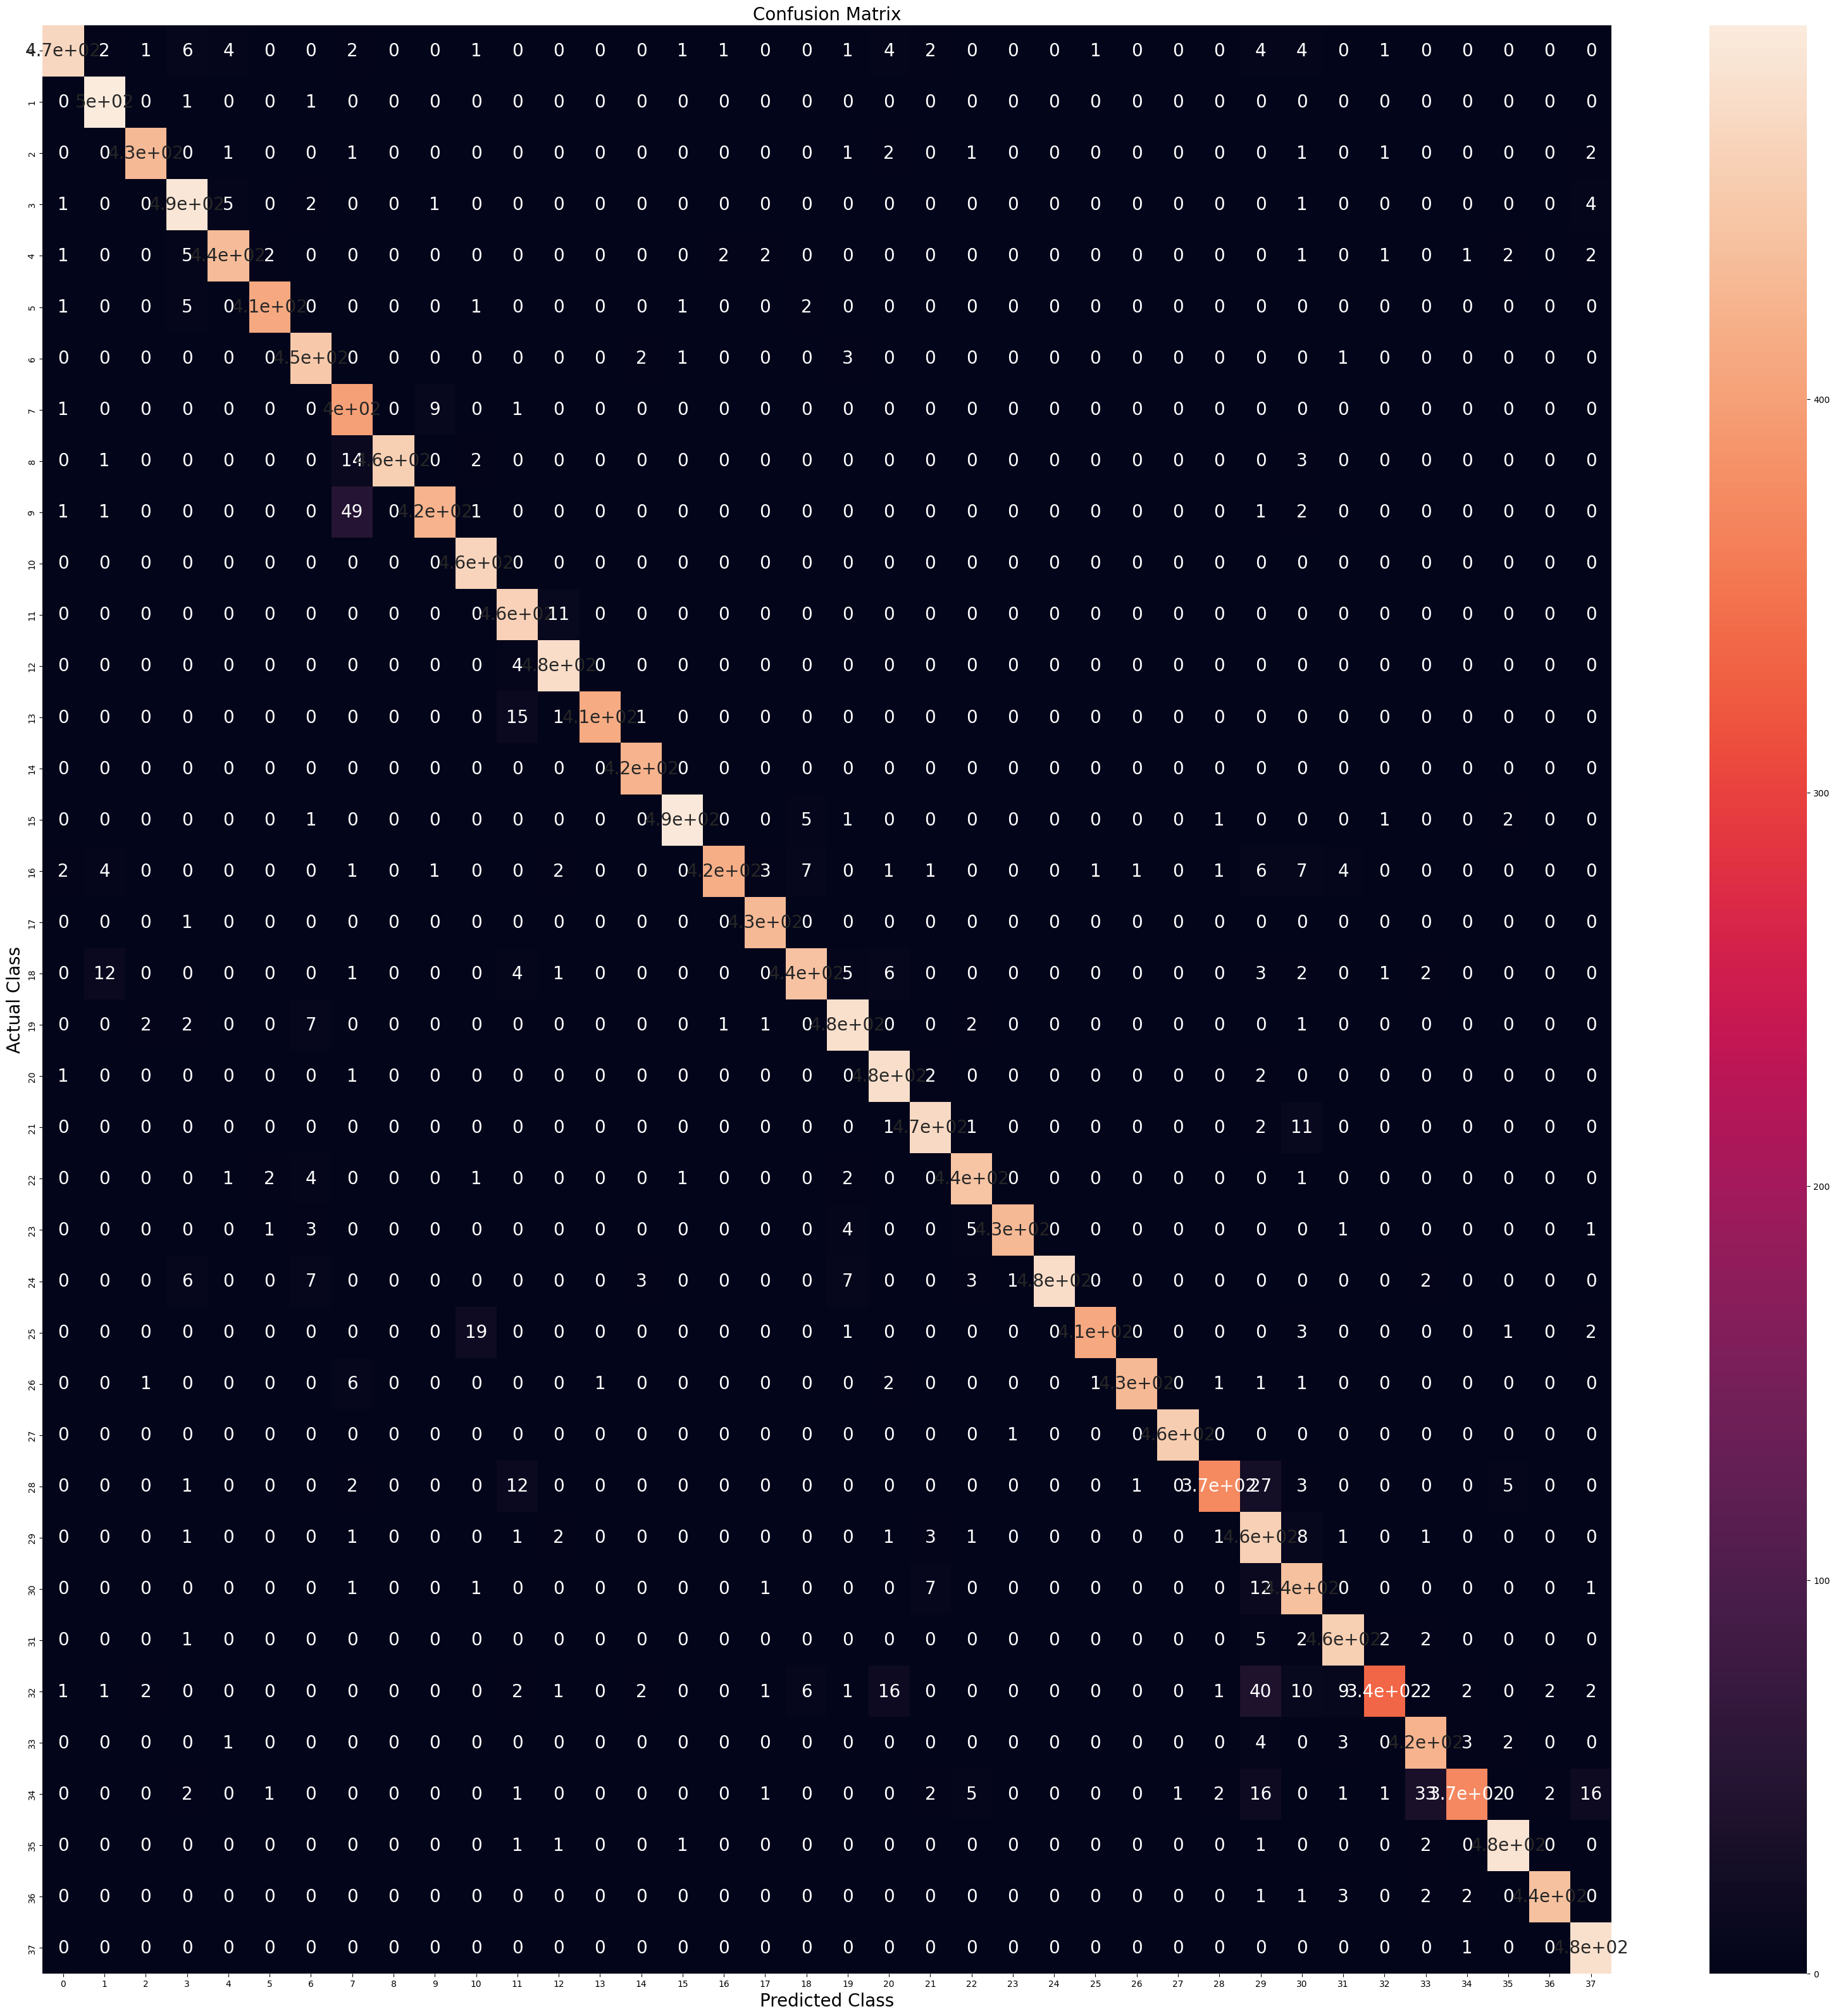

In [46]:

plt.figure(figsize=(40,40))
sns.heatmap(confmatrix,annot=True,annot_kws={'size':20})
plt.xlabel('Predicted Class',fontsize=20)
plt.ylabel('Actual Class',fontsize=20)
plt.title('Confusion Matrix',fontsize=20)
plt.show()

# Testing

**Visualizing Single image of test set**

In [47]:
!pip install opencv-python

In [48]:
import cv2
image_path = "/content/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus6.JPG"

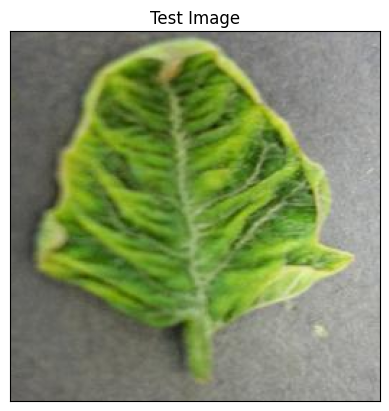

In [49]:
# Reading image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)  #Convert BGR image to RGB

# Displaying image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

# **Testing Model**

In [50]:
import numpy as np
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [51]:
prediction = model.predict(input_arr)
print(prediction.shape)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
(1, 38)


(array([[1.1014092e-18, 1.3809739e-21, 5.6416579e-13, 1.6634518e-17,
         1.1036520e-16, 1.6864891e-13, 7.9150032e-22, 5.3970573e-19,
         2.0639037e-20, 2.4361652e-18, 4.9911577e-19, 1.0231371e-14,
         1.3086009e-16, 7.1664739e-15, 5.4304540e-18, 3.0911949e-14,
         3.8839287e-20, 2.3493477e-22, 3.0630027e-16, 2.9743737e-17,
         6.2389669e-22, 3.6430834e-17, 2.3231081e-17, 5.2254557e-14,
         4.6090826e-18, 2.6818798e-13, 9.0323133e-17, 1.9336389e-17,
         3.1831790e-12, 9.0229294e-13, 3.7969353e-15, 1.4921614e-17,
         1.8869163e-17, 1.0456550e-15, 2.4774797e-15, 1.0000000e+00,
         6.6933748e-17, 6.7313735e-17]], dtype=float32),
 (1, 38))

In [52]:
result_index = np.argmax(prediction)
print(result_index)

35


In [53]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

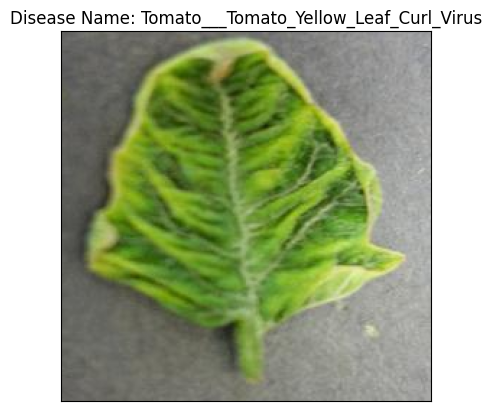

In [54]:
# Display result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title("Disease Name: "+model_prediction)
plt.xticks([])
plt.yticks([])
plt.show()